<a href="https://colab.research.google.com/github/sanganakcode/DeployML/blob/main/BankMarketing_1016_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [58]:
# Load the dataset
dataset = pd.read_csv("/content/bank-full.csv", sep=';')  # Assuming the file is delimited by semi-colons based on its format

# Display the first few rows of the dataset
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [59]:
# Check the shape of the dataset
num_records, num_features = dataset.shape
num_records, num_features

(45211, 17)

In [61]:
from numpy.random.mtrand import seed
sample=dataset.sample(n = 4789, random_state=0)

In [62]:
dataset = dataset.append(sample, ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [63]:
# Calculate the percentage of missing values for each column
missing_percentage = (dataset.isnull().sum() / num_records) * 100
missing_percentage

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [7]:
del dataset['duration']

In [8]:
pd.crosstab(index=dataset["contact"], columns=dataset["y"])

y,no,yes
contact,,
cellular,27467,4846
telephone,2766,433
unknown,13902,586


In [9]:
pd.crosstab(index=dataset["education"], columns=dataset["y"])

y,no,yes
education,,
primary,6928,654
secondary,23007,2724
tertiary,12448,2205
unknown,1752,282


In [10]:
pd.crosstab(index=dataset["marital"], columns=dataset["y"])

y,no,yes
marital,,
divorced,5064,699
married,27014,3033
single,12057,2133


In [11]:
pd.crosstab(index=dataset["poutcome"], columns=dataset["y"])

y,no,yes
poutcome,,
failure,4692,677
other,1695,340
success,592,1100
unknown,37156,3748


In [64]:
mean = dataset['balance'].mean()
std_dev = dataset['balance'].std()
print( mean)
print(std_dev)

1356.53348
3030.3353098297375


In [65]:
upper_bound = mean + 3 * std_dev
upper_bound

10447.539409489213

In [66]:
# Function to remove outliers based on the upper bound only
def upper_bound_outliers_removal(df, col, threshold=3):
    mean = df[col].mean()
    std_dev = df[col].std()

    upper_bound = mean + threshold * std_dev

    # Filter data without outliers exceeding the upper bound
    df_no_outliers = df.loc[df[col] <= upper_bound]

    return df_no_outliers, upper_bound

# Remove outliers for 'balance' column using upper bound only
upper_bound_cleaned_data, upper_bound = upper_bound_outliers_removal(dataset, 'balance', threshold=3)

# Returning the upper bound for 'balance' and the shape of the data after removal
upper_bound, dataset.shape, upper_bound_cleaned_data.shape

(10447.539409489213, (50000, 17), (49183, 17))

In [68]:
dataset = dataset[dataset['previous'] <= 20]
dataset.shape

(49942, 17)

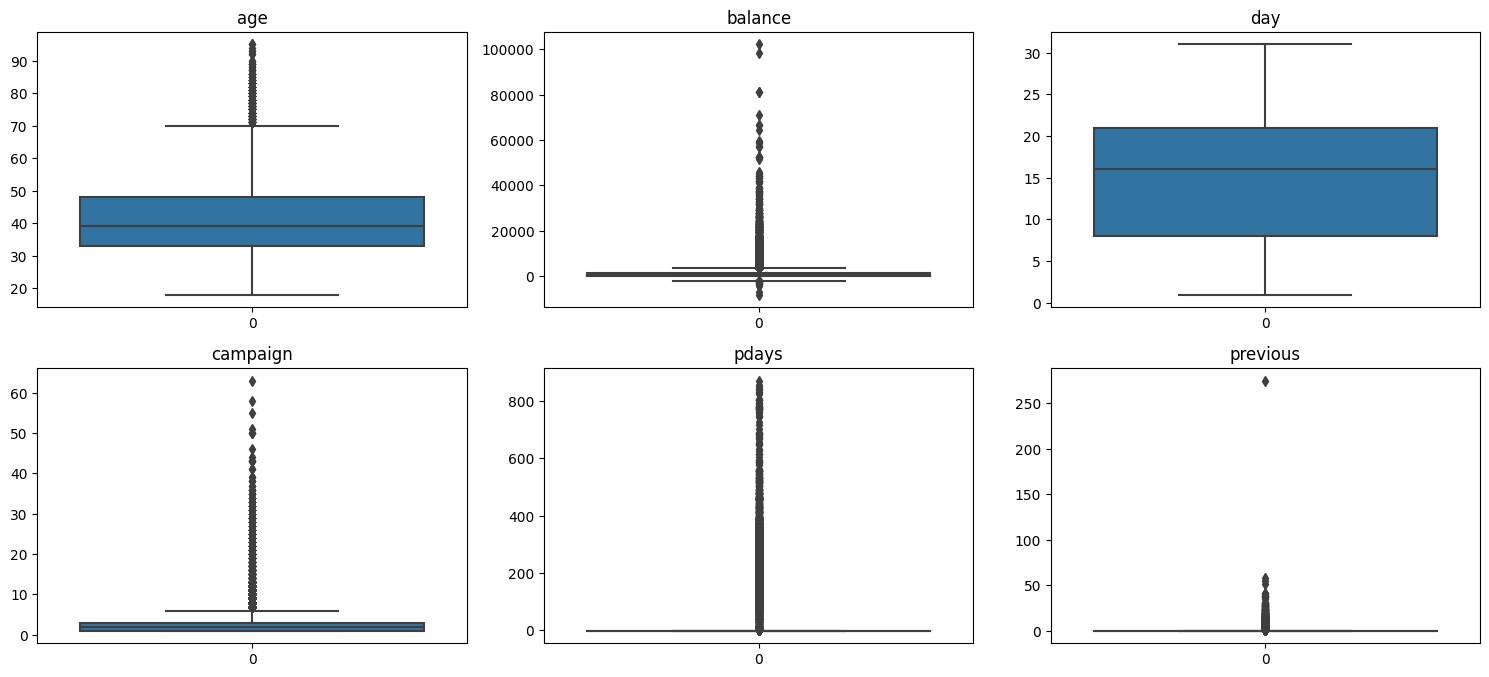

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns for visualization
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numeric column to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

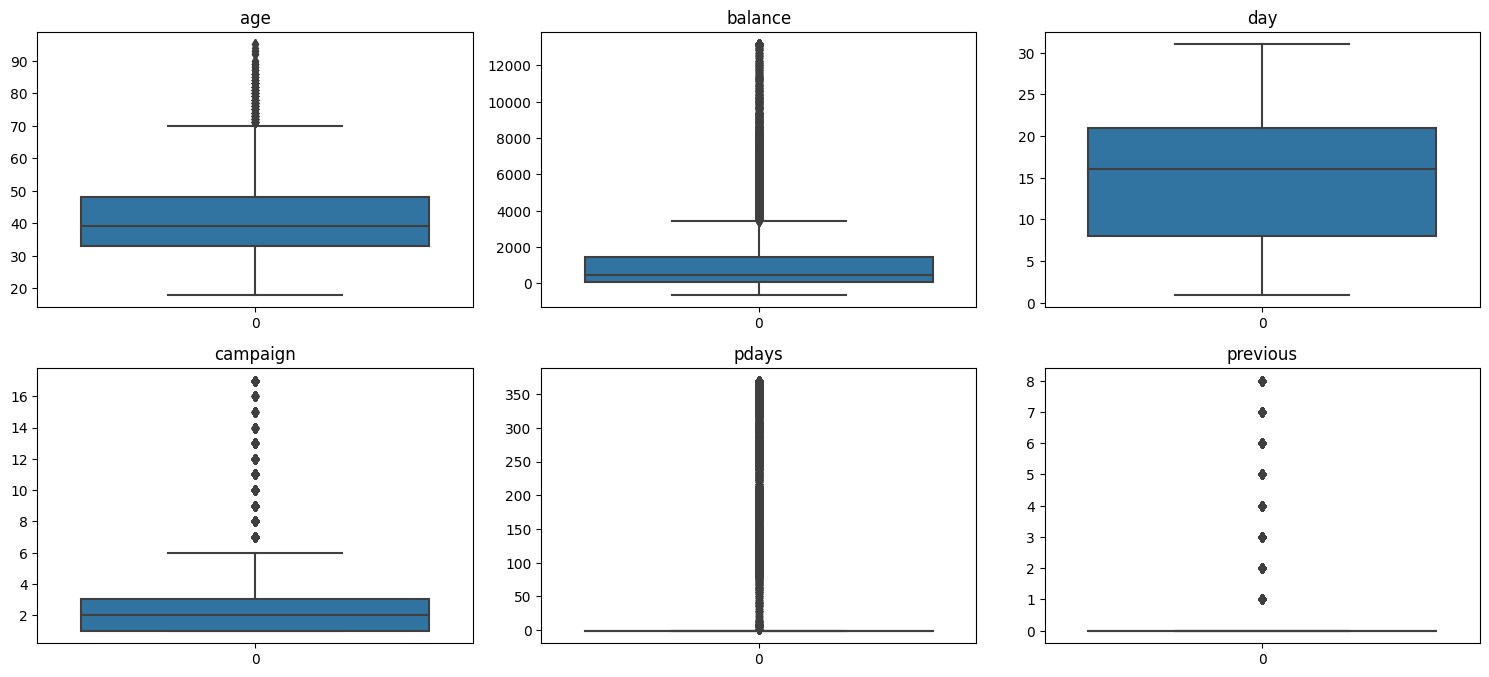

In [14]:
# Cap outliers based on the 1st and 99th percentiles
for col in ['balance', 'campaign', 'pdays', 'previous']:
    lower = dataset[col].quantile(0.01)
    upper = dataset[col].quantile(0.99)
    dataset[col] = dataset[col].clip(lower, upper)

# Plot the boxplots again to verify the changes
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [15]:
# Check the distribution of the target variable 'y'
target_distribution = dataset['y'].value_counts(normalize=True) * 100
target_distribution

no     88.27
yes    11.73
Name: y, dtype: float64

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

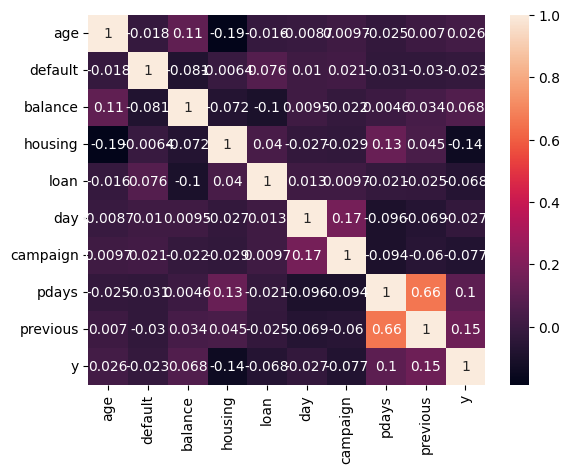

In [52]:
sns.heatmap(dataset.corr(),annot =True)

In [16]:
data=dataset

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create label encoders for binary categorical variables
binary_columns = ['default', 'housing', 'loan', 'y']
label_encoders = {col: LabelEncoder() for col in binary_columns}

# Apply label encoding to binary columns
for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

# Apply one-hot encoding to multi-category variables and drop the original columns
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Display the transformed data
data.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143.0,1,0,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29.0,1,0,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2.0,1,1,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506.0,1,0,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1.0,0,0,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
X = data.drop('y', axis=1)
y = data['y']

In [19]:
# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_temp, X_test_nn, y_temp, y_test_nn = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [20]:

from sklearn.preprocessing import StandardScaler

# Create a new scaler instance
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_nn)

# Now transform the datasets
X_train_nn_scaled = scaler.transform(X_train_nn)
X_val_nn_scaled = scaler.transform(X_val_nn)
X_test_nn_scaled = scaler.transform(X_test_nn)

X_train_nn_scaled.shape, X_val_nn_scaled.shape, X_test_nn_scaled.shape

((30000, 41), (10000, 41), (10000, 41))

In [21]:
# Oversampling
!pip install smote-variants

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.2/416.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=5da37b7cc812c77c6d847cb1d1c9eb749ff5b14e3a8e7a3be208037782b3efe3
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=939e9900fba6a8fc0059b2df9fdaa1d54bee1ce2204a3ced3fa81735ce960dd2
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


In [22]:
# Instantiating the SMOTE class
import smote_variants as sv
import numpy as np
oversampler= sv.SMOTE()

In [23]:
# Creating new training set
X_train_os, y_train_os = oversampler.sample(np.array(X_train_nn_scaled), np.array(y_train_nn))

2023-10-18 01:13:37,999:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-10-18 01:13:38,007:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-10-18 01:13:38,011:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-10-18 01:13:38,299:INFO:SMOTE: simplex sampl

In [24]:
# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape))
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_os==1)))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_os==0)))

After OverSampling, the shape of train_X: (52934, 41)
After OverSampling, the shape of train_y: (52934,) 

After OverSampling, counts of label 'Yes': 26467
After OverSampling, counts of label 'no': 26467


In [25]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.7 MB/s eta 0:00:00


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_nn_scaled.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

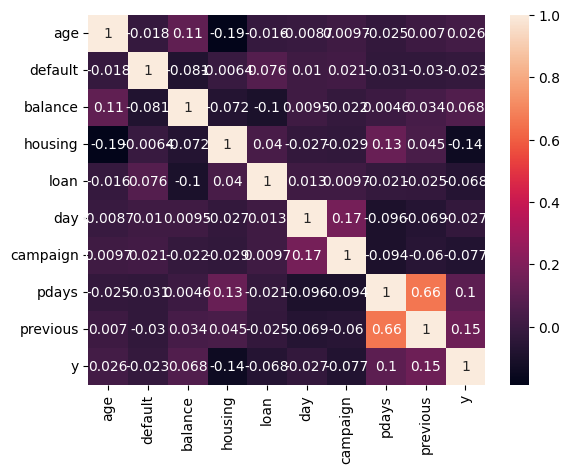

In [27]:
history = model.fit(X_train_os, y_train_os, validation_data=(X_val_nn_scaled, y_val_nn), epochs=50, batch_size=64, verbose=1)


Epoch 1/50
828/828 [==============================] - 16s 8ms/step - loss: 0.5993 - accuracy: 0.6754 - val_loss: 0.5518 - val_accuracy: 0.7692
Epoch 2/50
828/828 [==============================] - 8s 10ms/step - loss: 0.5438 - accuracy: 0.7251 - val_loss: 0.5366 - val_accuracy: 0.7727
Epoch 3/50
828/828 [==============================] - 7s 9ms/step - loss: 0.5312 - accuracy: 0.7331 - val_loss: 0.5433 - val_accuracy: 0.7544
Epoch 4/50
828/828 [==============================] - 6s 7ms/step - loss: 0.5218 - accuracy: 0.7411 - val_loss: 0.5322 - val_accuracy: 0.7696
Epoch 5/50
828/828 [==============================] - 5s 7ms/step - loss: 0.5144 - accuracy: 0.7454 - val_loss: 0.5534 - val_accuracy: 0.7572
Epoch 6/50
828/828 [==============================] - 3s 4ms/step - loss: 0.5083 - accuracy: 0.7489 - val_loss: 0.5091 - val_accuracy: 0.7835
Epoch 7/50
828/828 [==============================] - 3s 4ms/step - loss: 0.5011 - accuracy: 0.7557 - val_loss: 0.5273 - val_accuracy: 0.7684
Epoc

In [28]:
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train_os.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train_os, y_train_os, validation_data=(X_val_nn_scaled, y_val_nn), epochs=10, batch_size=64, verbose=1)


Trial 5 Complete [00h 02m 03s]
val_accuracy: 0.8058000008265177

Best val_accuracy So Far: 0.8058000008265177
Total elapsed time: 00h 10m 20s


In [29]:
loss, accuracy = model.evaluate(X_test_nn_scaled, y_test_nn)
print(f"Test Accuracy: {accuracy*100:.2f}%")


313/313 [==============================] - 1s 3ms/step - loss: 0.4644 - accuracy: 0.7995
Test Accuracy: 79.95%


In [30]:
type(model)

keras.src.engine.sequential.Sequential

In [31]:
y_pred_probs = model.predict(X_val_nn_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

313/313 [==============================] - 1s 2ms/step


In [32]:
true_positive = ((y_pred >= 0.5) & (y_val_nn == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val_nn == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val_nn == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val_nn == 0)).sum()
print(true_positive)
print(false_positive)
print(false_negative)
print(true_negative)

687
1528
503
7282


In [33]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.31015801354401806, 0.5773109243697478)

In [34]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val_nn == 1)).sum()
    fp = ((y_pred >= t) & (y_val_nn == 0)).sum()
    fn = ((y_pred < t) & (y_val_nn == 1)).sum()
    tn = ((y_pred < t) & (y_val_nn == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [35]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,1190,8810,0,0
1,0.01,687,1528,503,7282
2,0.02,687,1528,503,7282
3,0.03,687,1528,503,7282
4,0.04,687,1528,503,7282
...,...,...,...,...,...
96,0.96,687,1528,503,7282
97,0.97,687,1528,503,7282
98,0.98,687,1528,503,7282
99,0.99,687,1528,503,7282


In [36]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [37]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,1190,8810,0,0,1.000000,1.000000
10,0.1,687,1528,503,7282,0.577311,0.173439
20,0.2,687,1528,503,7282,0.577311,0.173439
30,0.3,687,1528,503,7282,0.577311,0.173439
40,0.4,687,1528,503,7282,0.577311,0.173439
50,0.5,687,1528,503,7282,0.577311,0.173439
60,0.6,687,1528,503,7282,0.577311,0.173439
70,0.7,687,1528,503,7282,0.577311,0.173439
80,0.8,687,1528,503,7282,0.577311,0.173439
90,0.9,687,1528,503,7282,0.577311,0.173439


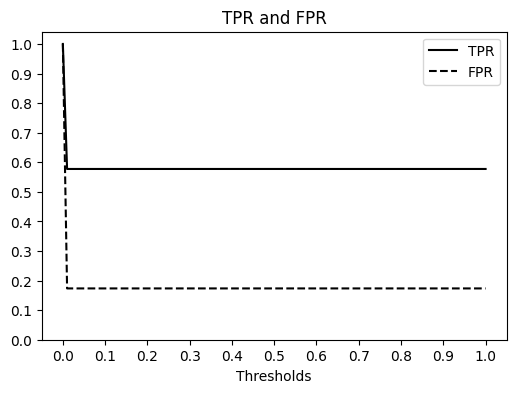

In [38]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

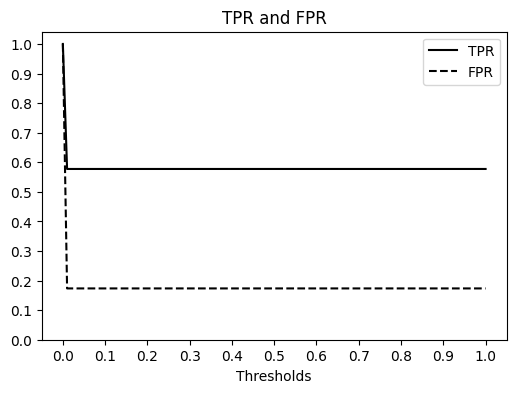

In [39]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

In [40]:
# Feature importance
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.3 MB/s eta 0:00:00


In [41]:
import shap
import tensorflow as tf
from tensorflow.keras import models, layers

In [42]:
# Use Deep SHAP to explain the model's predictions
explainer = shap.DeepExplainer(model, X_train_os)  # Using a subset for efficiency
shap_values = explainer.shap_values(X_test_nn_scaled)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [43]:
feature_names = X_train_nn.columns.tolist()

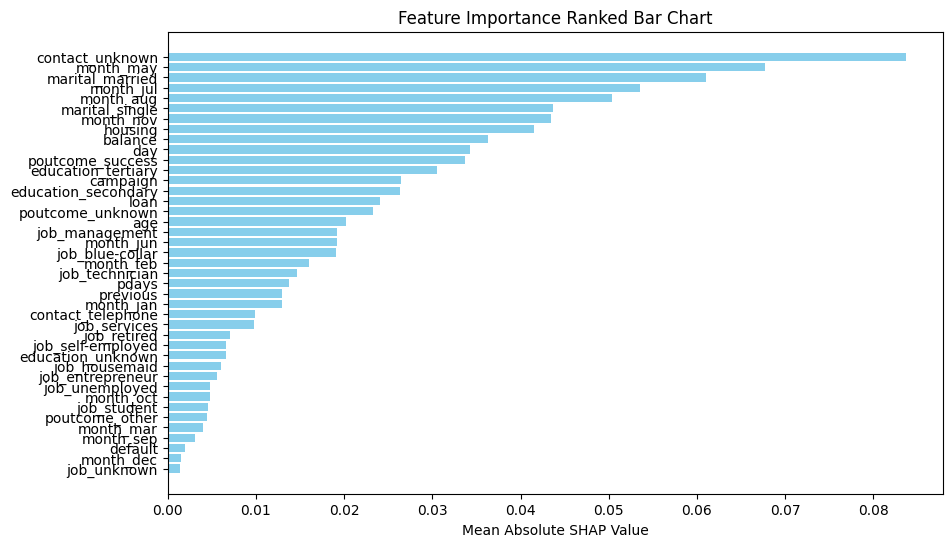

In [44]:


# Step 2: Summarize the SHAP values for each feature
# Calculate the mean absolute SHAP values for each feature
mean_shap_values = np.mean(np.abs(shap_values[0]), axis=0)

# Step 3: Sort the features by importance
feature_indices = np.argsort(mean_shap_values)

# Assuming you have a list of feature names in the order they appear in the dataset
feature_names = np.array(feature_names)[feature_indices]

# Step 4: Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_indices)), mean_shap_values[feature_indices], color='skyblue')
plt.yticks(range(len(feature_indices)), feature_names)
plt.title('Feature Importance Ranked Bar Chart')
plt.xlabel('Mean Absolute SHAP Value')
plt.show()

In [45]:
feature_indices

array([19, 28,  1, 37, 33, 38, 16, 36, 18, 10, 11, 24, 14, 13, 15, 25, 30,
        8,  7, 17, 29,  9, 32, 12,  0, 40,  4, 22,  6, 23, 39,  5,  2,  3,
       35, 21, 27, 31, 20, 34, 26])

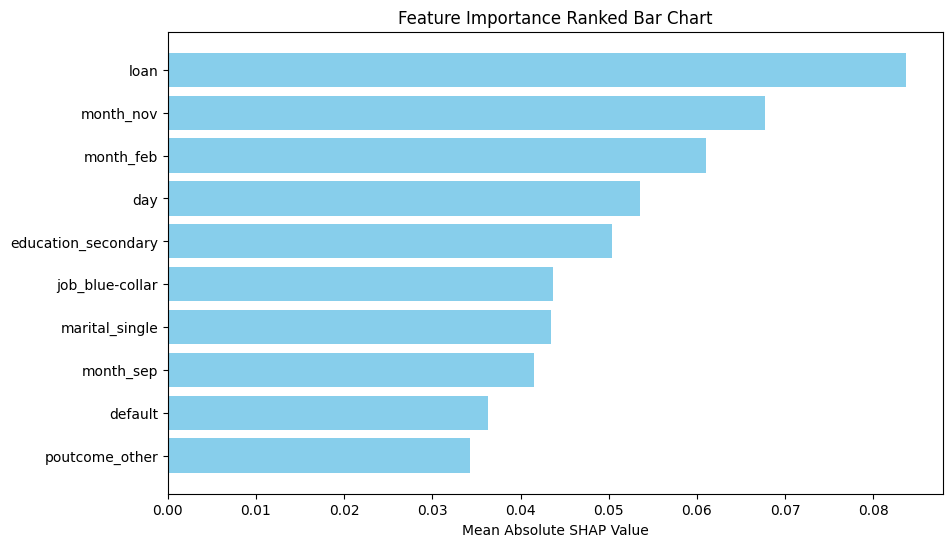

In [46]:
# Step 2: Summarize the SHAP values for each feature
# Calculate the mean absolute SHAP values for each feature
mean_shap_values = np.mean(np.abs(shap_values[0]), axis=0)

# Step 3: Sort the features by importance
top_features = 10
feature_indices = np.argsort(mean_shap_values)[-top_features:]


# Assuming you have a list of feature names in the order they appear in the dataset
feature_names = np.array(feature_names)[feature_indices]

# Step 4: Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(top_features), mean_shap_values[feature_indices], color='skyblue')
plt.yticks(range(top_features), feature_names)
plt.title('Feature Importance Ranked Bar Chart')
plt.xlabel('Mean Absolute SHAP Value')
plt.show()

In [47]:
feature_indices = np.argsort(mean_shap_values)
feature_indices

array([19, 28,  1, 37, 33, 38, 16, 36, 18, 10, 11, 24, 14, 13, 15, 25, 30,
        8,  7, 17, 29,  9, 32, 12,  0, 40,  4, 22,  6, 23, 39,  5,  2,  3,
       35, 21, 27, 31, 20, 34, 26])

In [48]:
feature_names

array(['poutcome_other', 'default', 'month_sep', 'marital_single',
       'job_blue-collar', 'education_secondary', 'day', 'month_feb',
       'month_nov', 'loan'], dtype='<U19')

In [49]:
mean_shap_values

array([0.02021512, 0.002014  , 0.03630773, 0.04151687, 0.024105  ,
       0.03424586, 0.02646371, 0.01379321, 0.01296601, 0.01907034,
       0.00553964, 0.00599652, 0.01919912, 0.00705691, 0.00662322,
       0.00975321, 0.00456707, 0.01465703, 0.00477186, 0.00138411,
       0.06099205, 0.04369733, 0.02638292, 0.0305358 , 0.006587  ,
       0.00983945, 0.08368834, 0.05038975, 0.00147475, 0.01605   ,
       0.01290437, 0.05350978, 0.01913699, 0.00398955, 0.06775708,
       0.04345291, 0.0047515 , 0.00311182, 0.0044223 , 0.03372707,
       0.02329791])

In [50]:
# Step 3: Sort the features by importance
feature_indices = np.argsort(mean_shap_values)

# Assuming you have a list of feature names in the order they appear in the dataset
feature_names = np.array(feature_names)[feature_indices]

# Step 4: Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_indices)), mean_shap_values[feature_indices], color='skyblue')
plt.yticks(range(len(feature_indices)), feature_names[feature_indices])
plt.title('Feature Importance Ranked Bar Chart')
plt.xlabel('Mean Absolute SHAP Value')
plt.show()

IndexError: ignored

In [ ]:
imp = np.column_stack((feature_names, mean_shap_values))
df = pd.DataFrame(imp, columns=["Feature_Name", "Mean_Shap_Value"])
df

In [ ]:
feature_names

In [ ]:
top_features = 10
feature_indices = np.argsort(mean_shap_values)[-top_features:]

# Assuming you have a list of feature names in the order they appear in the dataset
feature_names_array = np.array(feature_names)
top_feature_names = feature_names_array[feature_indices]

# Step 4: Plot a bar chart for only the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(top_features), mean_shap_values[feature_indices], color='skyblue')
plt.yticks(range(top_features), top_feature_names)
plt.title('Top 10 Feature Importance Ranked Bar Chart')
plt.xlabel('Mean Absolute SHAP Value')
plt.show()








In [ ]:
y_pred_probs = model.predict(X_test_nn_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

In [ ]:

# Compute the confusion matrix using TensorFlow
conf_matrix = tf.math.confusion_matrix(y_test_nn, y_pred).numpy()

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('/content/model')
import joblib
joblib.dump(scaler, '/content/scaler.pkl')

In [ ]:
joblib.dump(shap_values, '/content/shap_values.pkl')

In [ ]:
!zip -r /content/default_model.zip /content/model

In [ ]:
from google.colab import files
files.download('/content/default_model.zip')

In [ ]:
files.download('/content/shap_values.pkl')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
print(best_model)

In [ ]:
import tensorflow as tf

In [ ]:
# I can run this from anywhere... but i choose to do it from here... because it's already up:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create label encoders for binary categorical variables
binary_columns = ['default', 'housing', 'loan', 'y']
label_encoders = {col: LabelEncoder() for col in binary_columns}

# Apply label encoding to binary columns
for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

# Apply one-hot encoding to multi-category variables and drop the original columns
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Display the transformed data
data.head()

# Select a sample from the test set - NOT NEEDED...
sample_index = 10  # You can choose any index from the test set
sample = X_test_nn_scaled[sample_index].tolist()
# sample_scaled = X_test_scaled[sample_index].tolist()

# Define the URL of your microservice
url = "https://4000-sanganakcode-deployml-i5qrdhr5xmi.ws-us105.gitpod.io/predict"  # Replace with the actual URL of your microservice

# Send a POST request to the microservice
# response = requests.post(url, json={'data': sample_scaled})
response = requests.post(url, json={'data': sample})

# Print the response from the microservice
print("Status Code:", response.status_code)
print("Response JSON:", response.json())

In [ ]:
y_pred_probs[10]